<a href="https://colab.research.google.com/github/Captaingreenbeard/DataAnalyticsLab_SEM7/blob/main/DA_Lab4_climateChange_Lin_Regg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns

# Problem 1.0 > Investigating and getting comfortable with the dataset

In [104]:
#dataset: https://drive.google.com/file/d/1PAPiOvwkmVk98cyHqfyzTEbdCHO2gRtD/view?usp=share_link
data = pd.read_csv("climate_change.csv")

In [105]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [106]:
data.tail()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
307,2008,12,-0.666,385.56,1812.88,322.182,244.204,535.005,1365.6926,0.0046,0.330


In [107]:
data.shape
#rows, columns

(308, 11)

In [108]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [109]:
# trying to understand the features
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [110]:
data.nunique()
#number of unique values for each attribute

Year         26
Month        12
MEI         294
CO2         298
CH4         303
N2O         304
CFC-11      307
CFC-12      307
TSI         302
Aerosols    155
Temp        242
dtype: int64

In [111]:
# lets see as to how clean is the dataset
data.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

* therefore we have no value which has any null value
* the dataset is already clean; therfore no need of any cleaning

now that the dataset is cleaned; lets try to figure out the correlation between the attributes by drawing a heatmap of the correlation coef.

In [112]:
correl = data.corr()

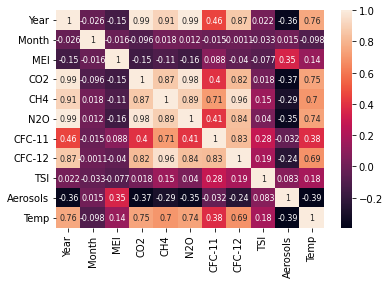

In [113]:
sns.heatmap(correl,xticklabels=correl.columns, yticklabels=correl.columns, annot=True, annot_kws={'size': 8})

# Problem 1.1 > Creating Our First Model

**Have expriemented by using sklearn's and tensoflow's linear regression function**

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

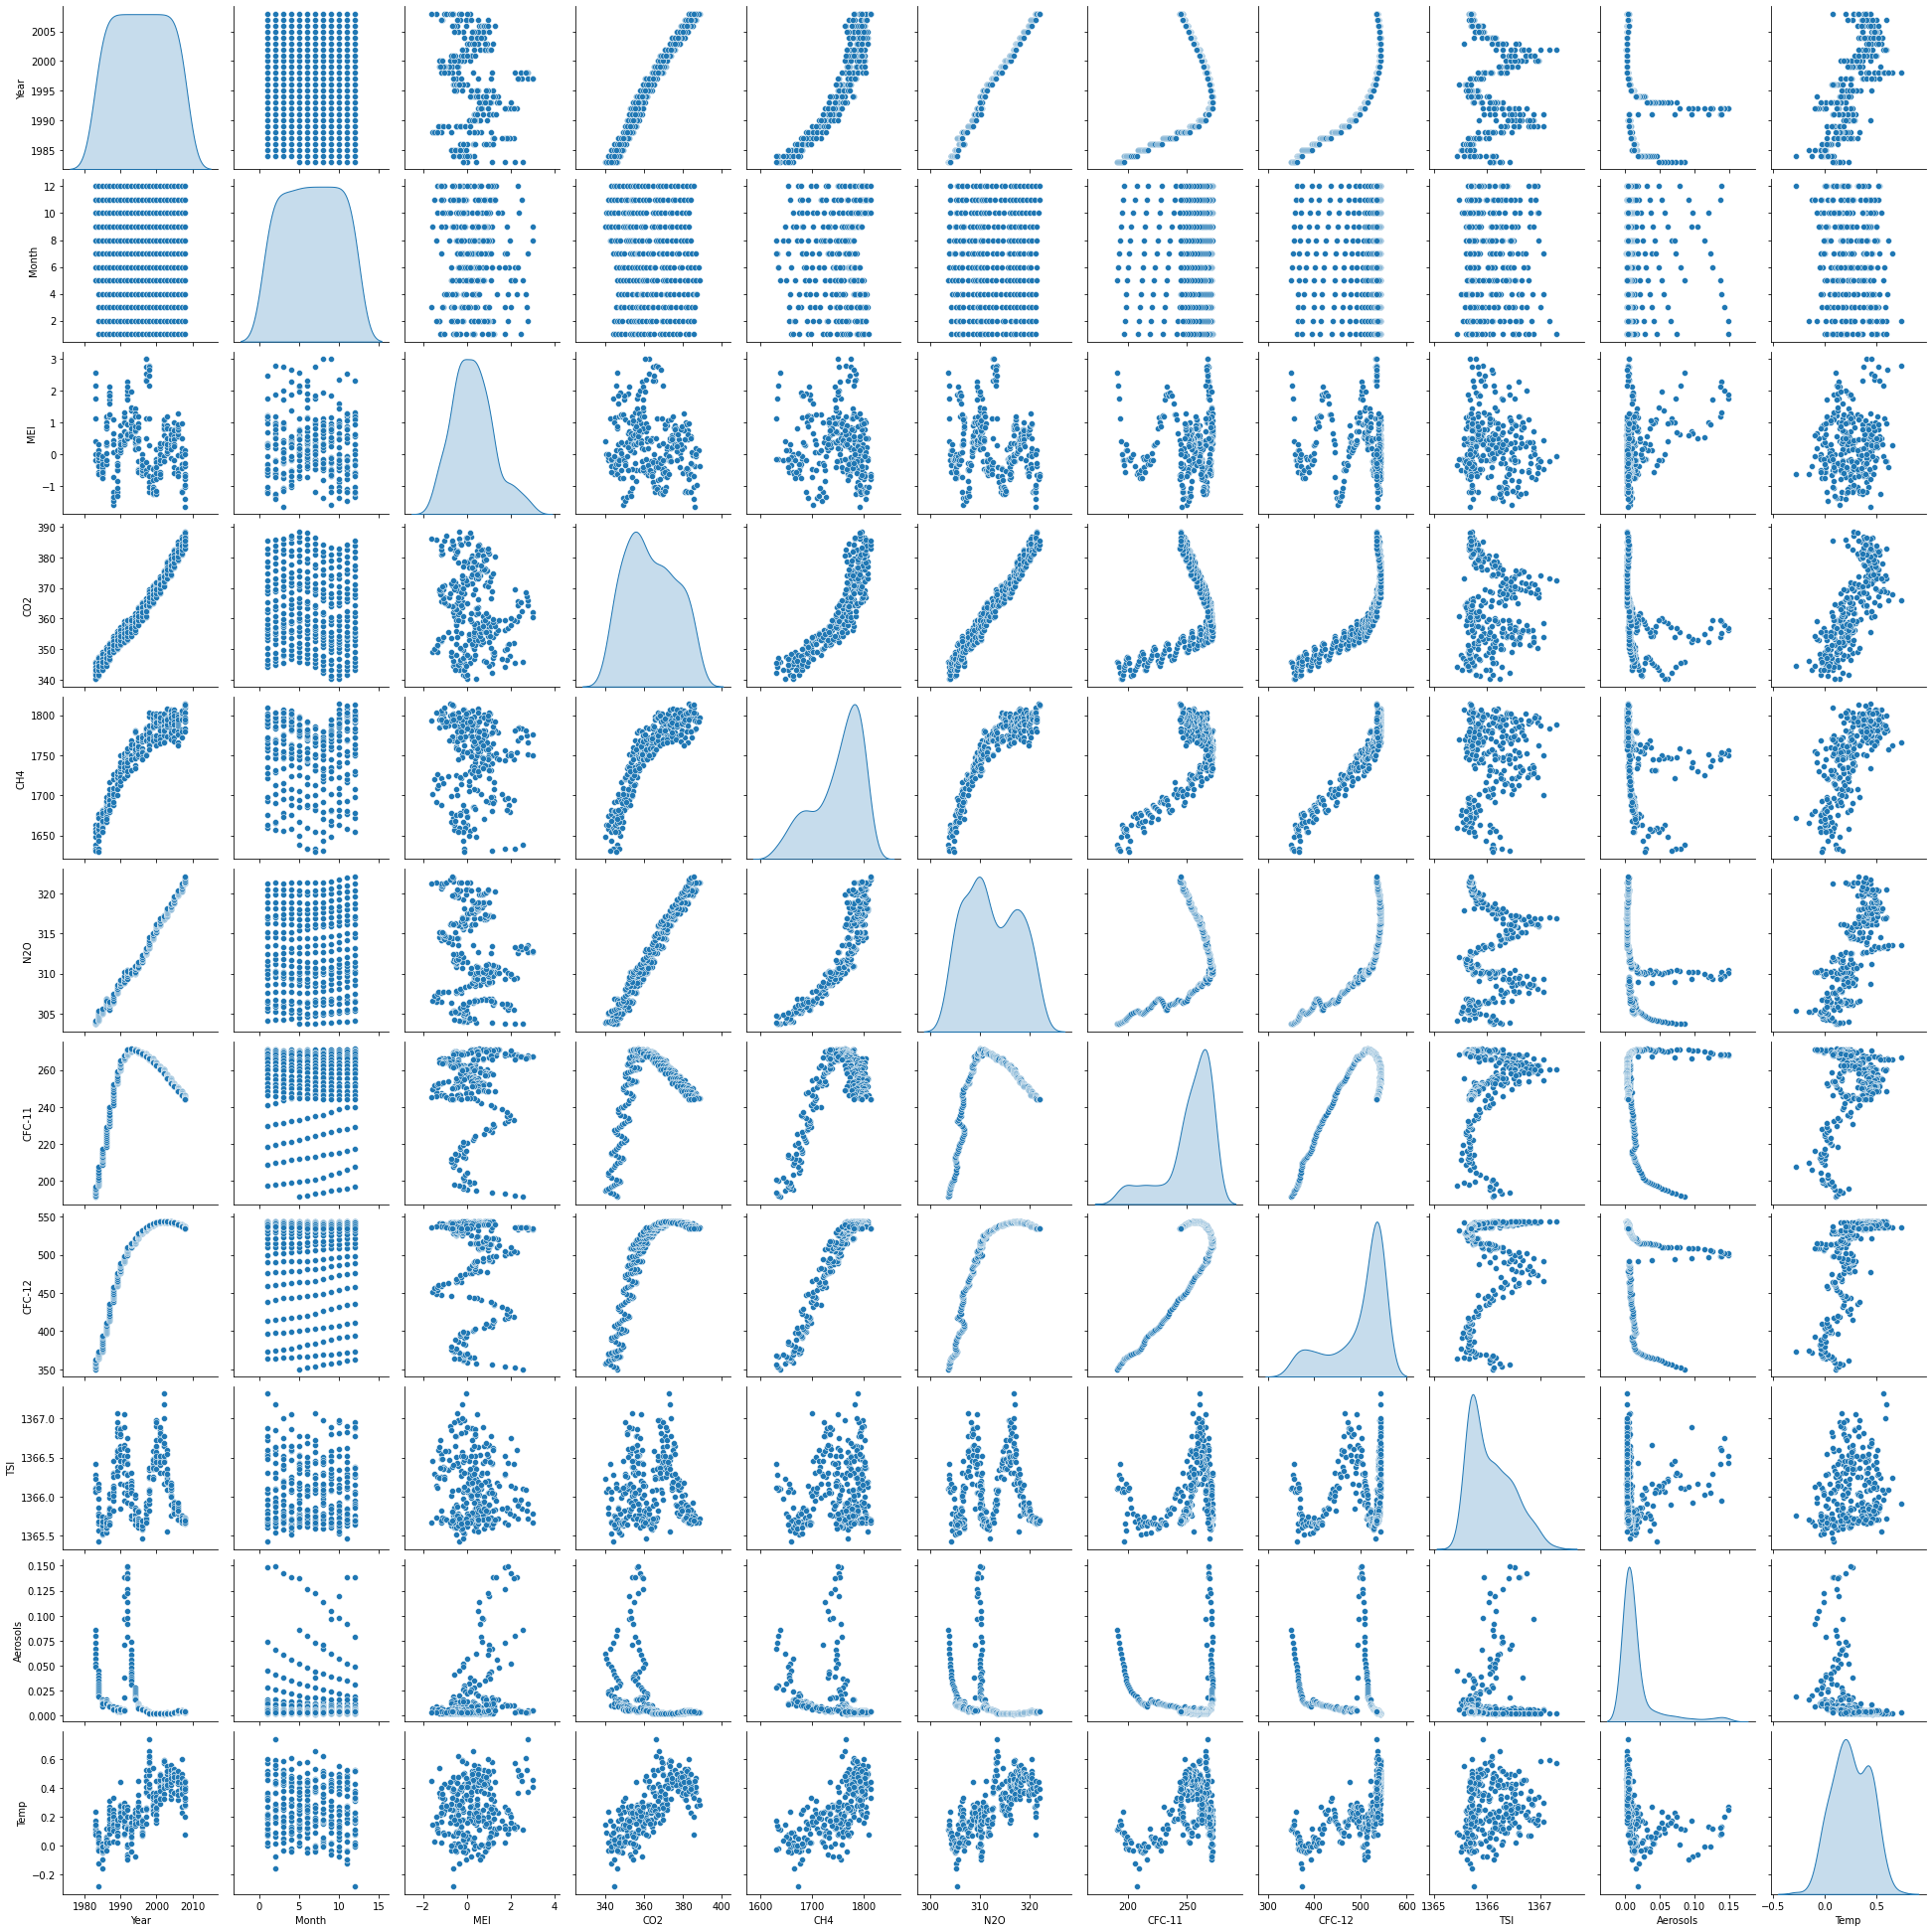

In [115]:
sns.pairplot(data, diag_kind='kde')

In [145]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [146]:
data_train=data[data.Year<=2006]
data_test=data[data.Year>2006]

In [147]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error
  
# load the boston dataset
# defining feature matrix(X) and response vector(y)

X_train = pd.DataFrame(data_train, columns=['MEI','CO2', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
y_train=data_train['Temp']
X_test = pd.DataFrame(data_test, columns=['MEI','CO2', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
y_test=data_test['Temp']

#normalizing as good practice
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
normalizer.adapt(np.array(X_test))

reg = linear_model.LinearRegression()
  
reg.fit(X_train, y_train)
  
print('Coefficients: ', reg.coef_)

print('Variance score: {}'.format(reg.score(X_train, y_train)))
y_pred = reg.predict(X_test)
errors = mean_squared_error(y_test,y_pred)
print("Mean Squared error: ",errors)
#print("Model R2 score",metrics.r2_score(y_test, y_pred))

Coefficients:  [ 0.064  0.006  0.    -0.017 -0.007  0.004  0.093 -1.538]
Variance score: 0.7508932770523429
Mean Squared error:  0.009097810529180444


# Problem 1.2 > Creating Our first model, finding significant variables

In [148]:
import statsmodels.api as sm

x_incl_cons = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results

pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,pvalue
const,-124.594260,0.000
MEI,0.064205,0.000
CO2,0.006457,0.005
CH4,0.000124,0.810
N2O,-0.016528,0.055
CFC-11,-0.006630,0.000
CFC-12,0.003808,0.000
TSI,0.093141,0.000
Aerosols,-1.537613,0.000


In [149]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

The p values for CH4 and N2O are greater than 0.05 hence indicating that these attributes are insignificant.

P value for CH4 = 0.810

P value for N2O = 0.055

**therfore the significant variables are: 'MEI', 'CO2', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols', 'Temp'**

# Problem 2.1> Understanding the Model - the N2O CFC11 anomoly

# Question:
Current scientific opinion is that nitrous oxide and CFC-11 are greenhouse gases: gases that 
are able to trap heat from the sun and contribute to the heating of the Earth. However, the 
regression coefficients of both the N2O and CFC-11 variables are negative, indicating that 
increasing atmospheric concentrations of either of these two compounds is associated with 
lower global temperatures.
Which of the following is the simplest correct explanation for this contradiction?



option1> Climate scientists are wrong that N2O and CFC-11 are greenhouse gases - this regression analysis constitutes part of a disproof.

option2> There is not enough data, so the regression coefficients being estimated are not accurate.

option3> All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set.

In [152]:
X_train.corr()

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
MEI,1.000000,-0.041147,-0.033419,-0.050820,0.069000,0.008286,-0.154492,0.340238
CO2,-0.041147,1.000000,0.877280,0.976720,0.514060,0.852690,0.177429,-0.356155
CH4,-0.033419,0.877280,1.000000,0.899839,0.779904,0.963616,0.245528,-0.267809
N2O,-0.050820,0.976720,0.899839,1.000000,0.522477,0.867931,0.199757,-0.337055
CFC-11,0.069000,0.514060,0.779904,0.522477,1.000000,0.868985,0.272046,-0.043921
CFC-12,0.008286,0.852690,0.963616,0.867931,0.868985,1.000000,0.255303,-0.225131
TSI,-0.154492,0.177429,0.245528,0.199757,0.272046,0.255303,1.000000,0.052117
Aerosols,0.340238,-0.356155,-0.267809,-0.337055,-0.043921,-0.225131,0.052117,1.000000


#ANSWER: 

Option1 is highly unlikely/incorrect as we see a signficant correlation between N2O and [CO2, CH4, CFC-12], which in turn are sigificant variables (as seen in last few cells)

A statisfactory accuracy was achieved, and thereby eliminating Option2 used dataset is not large enough

Option3 is the simplest correct explanation for this contradiction. This is becuase we see a signficant correlation between N2O and [CO2, CH4, CFC-12], and we also see a signficant correlation between CFC11 and [CH4, CFC-12], all variables which are sigificant (as seen in last few cells), and therfore have direct positive correlation with temperature increases.